![Los Angeles skyline](la_skyline.jpg)

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

Import required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


In [3]:
crimes.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA NAME',
       'Crm Cd Desc', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Weapon Desc',
       'Status Desc', 'LOCATION'],
      dtype='object')

## Plot heatmap of crime counts by hour

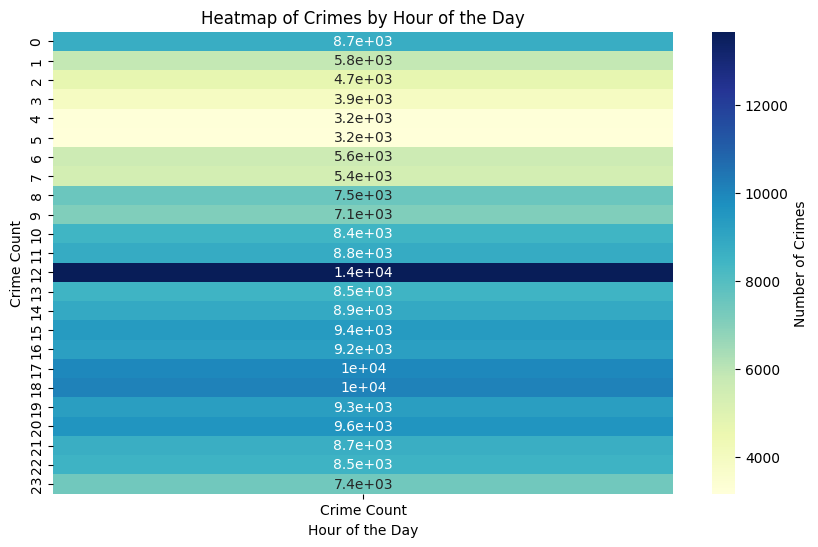

In [16]:
hourly_data = crimes.groupby('Hour').size().reset_index(name='Crime Count')
pivot_table = hourly_data.pivot_table(index='Hour', values='Crime Count', aggfunc='sum')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', cbar_kws={'label': 'Number of Crimes'})
plt.title('Heatmap of Crimes by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Crime Count')
plt.show()

## Peak Crime Hour

In [4]:
crimes['TIME OCC'] = crimes['TIME OCC'].astype(str).str.zfill(4)
crimes['Hour'] = crimes['TIME OCC'].str[:2].astype(int)

hour_counts = crimes['Hour'].value_counts().sort_index()

peak_crime_hour = hour_counts.idxmax()

print(f"The hour with the highest frequency of crimes is: {peak_crime_hour}")

The hour with the highest frequency of crimes is: 12


## Plot distribution of crimes by hour

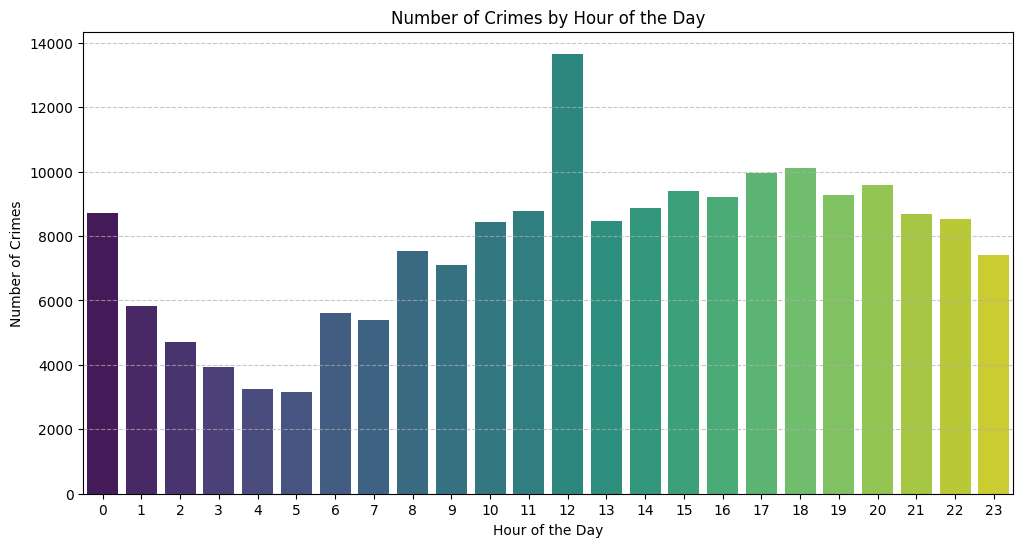

In [5]:
plt.figure(figsize=(12, 6))
sns.barplot(x=hour_counts.index, y=hour_counts.values, palette='viridis')
plt.title('Number of Crimes by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Crimes')
plt.xticks(ticks=np.arange(0, 24, 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Plot distribution of crimes by hour using line plot

d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


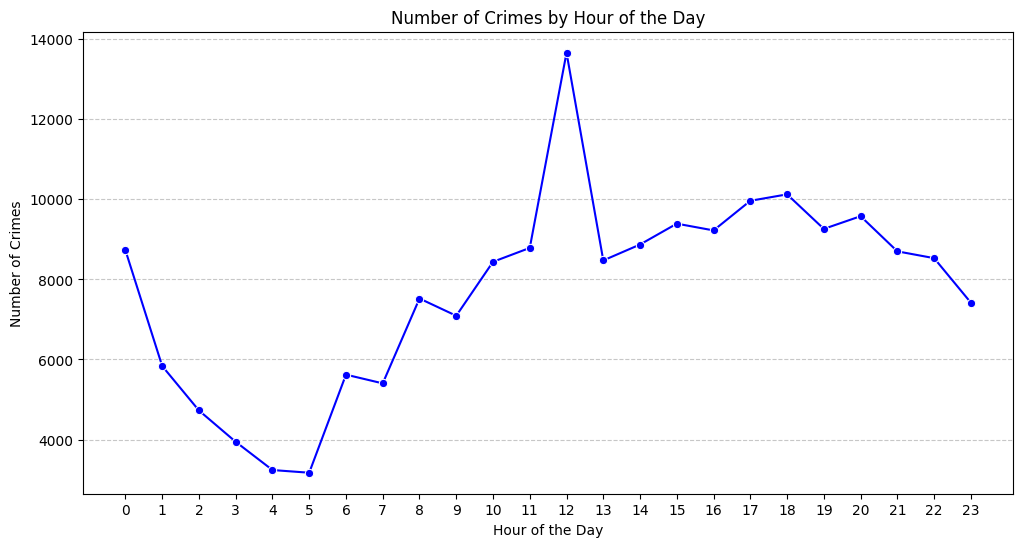

In [13]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=hour_counts.index, y=hour_counts.values, marker='o', color='b')
plt.title('Number of Crimes by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Crimes')
plt.xticks(ticks=np.arange(0, 24, 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Peak Night Crime Location

In [7]:
is_night_crime = (crimes['Hour'] >= 22) | (crimes['Hour'] < 4)
night_crimes = crimes[is_night_crime]
area_counts = night_crimes['AREA NAME'].value_counts()
peak_night_crime_location = area_counts.idxmax()
print(f"The area with the highest frequency of night crimes is: {peak_night_crime_location}")

The area with the highest frequency of night crimes is: Central


## Plot distribution of night crimes by area

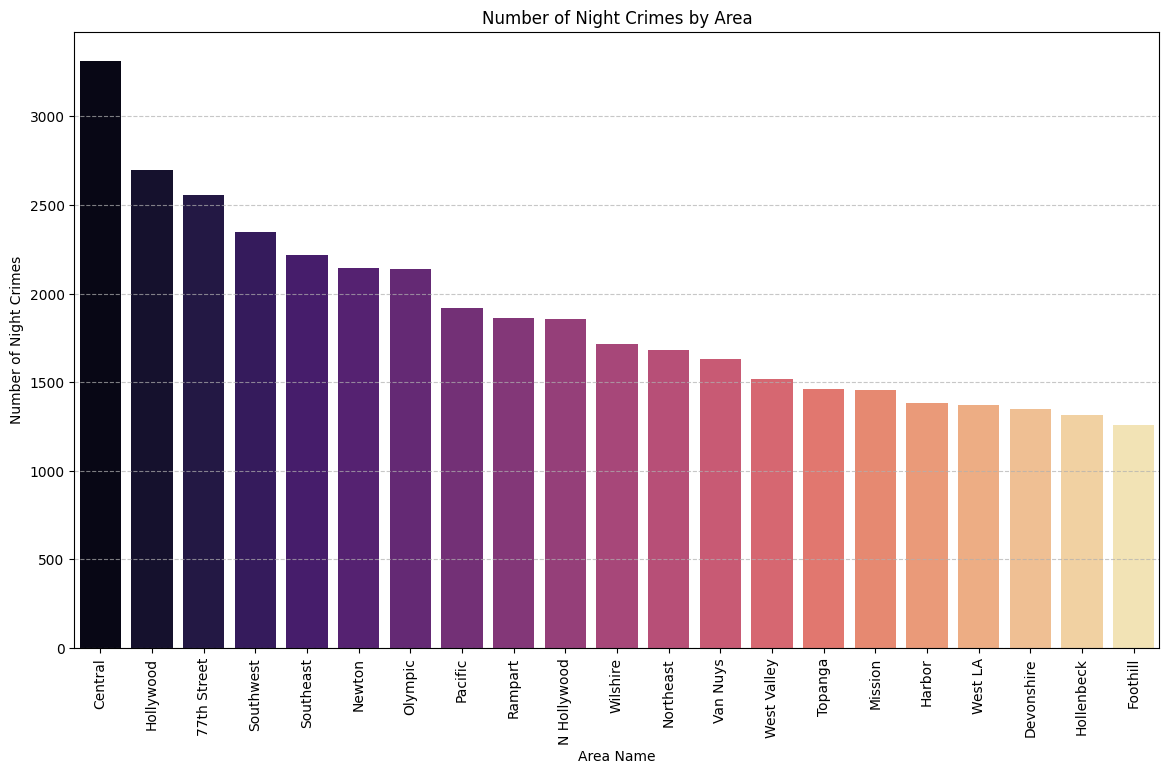

In [8]:
plt.figure(figsize=(14, 8))
sns.barplot(x=area_counts.index, y=area_counts.values, palette='magma')
plt.title('Number of Night Crimes by Area')
plt.xlabel('Area Name')
plt.ylabel('Number of Night Crimes')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Plot distribution of night crimes by area using pie chart

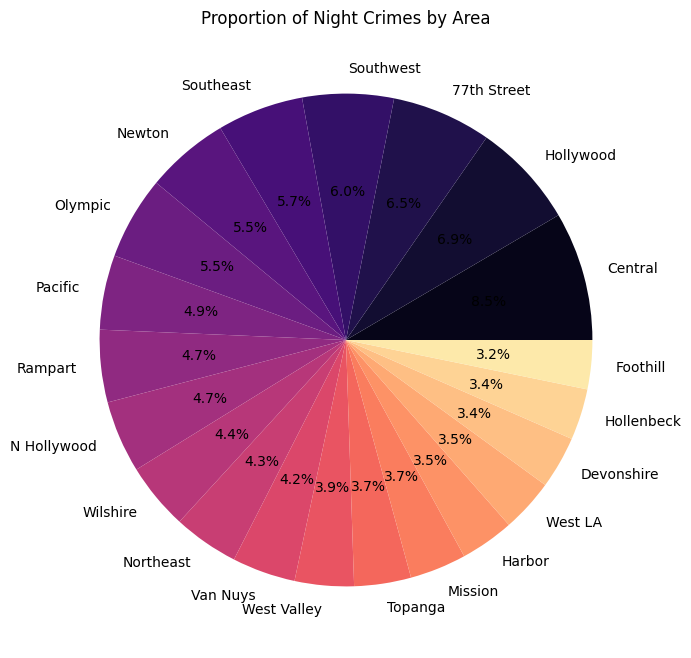

In [14]:
plt.figure(figsize=(12, 8))
plt.pie(area_counts, labels=area_counts.index, autopct='%1.1f%%', colors=sns.color_palette('magma', len(area_counts)))
plt.title('Proportion of Night Crimes by Area')
plt.show()

## Victim Ages

In [10]:
bins = [0, 17, 25, 34, 44, 54, 64, float('inf')]
labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]

crimes['Age Group'] = pd.cut(crimes['Vict Age'], bins=bins, labels=labels, right=True)

victim_ages = crimes['Age Group'].value_counts().reindex(labels)

print(victim_ages)

Age Group
0-17      4528
18-25    28291
26-34    47470
35-44    42157
45-54    28353
55-64    20169
65+      14747
Name: count, dtype: int64


## Plot distribution of victim ages using pie chart

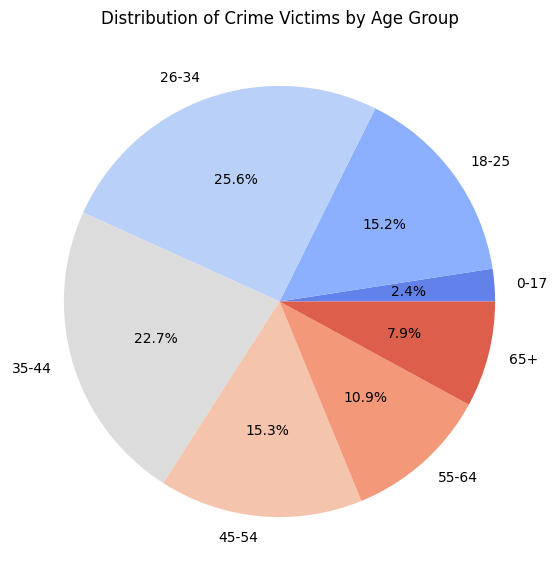

In [17]:
plt.figure(figsize=(10, 7))
plt.pie(victim_ages, labels=victim_ages.index, autopct='%1.1f%%', colors=sns.color_palette('coolwarm', len(victim_ages)))
plt.title('Distribution of Crime Victims by Age Group')
plt.show()

## Plot distribution of victim ages

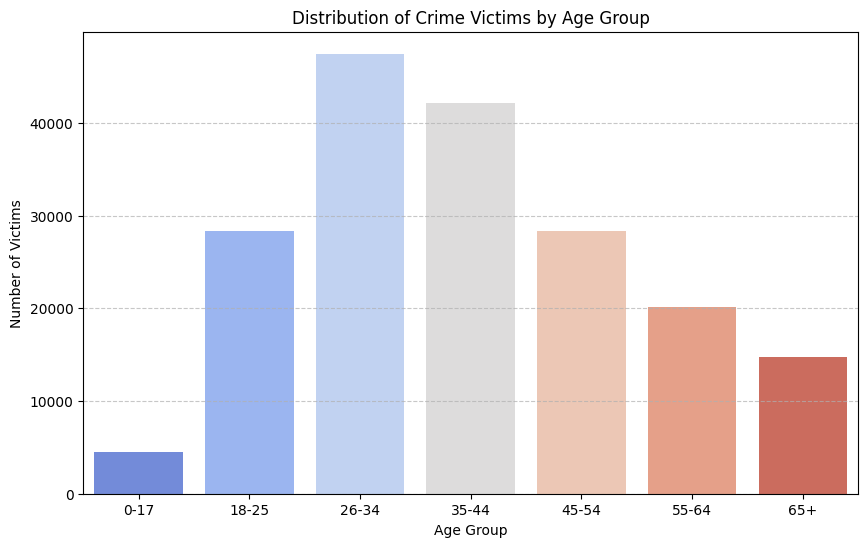

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(x=victim_ages.index, y=victim_ages.values, palette='coolwarm')
plt.title('Distribution of Crime Victims by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Victims')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()